# Python

**Table of Contents**

* 1. Multiprocess and thread
    * 1.1 Process
    * 1.2 Pool()
* 2. Scipy
    * 2.1 ndimage


## 1. Multiprocess and thread


Process: 进程是操作系统分配资源的最小单元, 线程是操作系统调度的最小单元。

Thread: 一个应用程序至少包括1个进程，而1个进程包括1个或多个线程，线程的尺度更小。

* 每个进程在执行过程中拥有独立的内存单元，而一个进程的多个线程在执行过程中共享内。
* 任一时刻，CPU总是运行一个进程，其他进程处于非运行状态。


## Multiprocess

**Multiprocessing:** multiprocessing is a package that supports spawning processes using an API similar to the threading module.
    
    


In [6]:
from multiprocessing import  Process

def fun1(name):
    print('测试%s多进程' %name)

if __name__ == '__main__':
    process_list = []
    for i in range(5):  #开启5个子进程执行fun1函数
        p = Process(target=fun1,args=('Python',)) #实例化进程对象
        p.start()
        process_list.append(p)

    for i in process_list:
        p.join()

    print('结束测试')


测试Python多进程
测试Python多进程
测试Python多进程测试Python多进程

测试Python多进程
结束测试


#### 1.1 `Process`
Creat multiprocesses using Class `Process` and calling method `start()` then. 

In [8]:
from multiprocessing import Process
import os

def info(title):
    print(title)
    print('module name:', __name__)
    print('parent process:', os.getppid())
    print('process id:', os.getpid())

def f(name):
    info('function f')
    print('hello', name)

if __name__ == '__main__':
    info('main line')
    p = Process(target=f, args=('bob',))
    p.start()
    p.join()


main line
module name: __main__
parent process: 20670
process id: 21332
function f
module name: __main__
parent process: 21332
process id: 25383
hello bob


#### 2.2 `Pool`
Creat multiprocess using Class `Pool`.

Pool类可以提供指定数量的进程供用户调用，当有新的请求提交到Pool中时，如果进程池还没有满，就会创建一个新的进程来执行请求。如果池满，请求就会告知先等待，直到池中有进程结束，才会创建新的进程来执行这些请求。

The Pool class represents a pool of worker processes. It has methods which allows tasks to be offloaded to the worker processes in a few different ways.

1.apply_async

函数原型：apply_async(func[, args=()[, kwds={}[, callback=None]]])

其作用是向进程池提交需要执行的函数及参数， 各个进程采用非阻塞（异步）的调用方式，即每个子进程只管运行自己的，不管其它进程是否已经完成。这是默认方式。

2.map()

函数原型：map(func, iterable[, chunksize=None])

Pool类中的map方法，与内置的map函数用法行为基本一致，它会使进程阻塞直到结果返回。 注意：虽然第二个参数是一个迭代器，但在实际使用中，必须在整个队列都就绪后，程序才会运行子进程。

3.map_async()

函数原型：map_async(func, iterable[, chunksize[, callback]])
与map用法一致，但是它是非阻塞的。其有关事项见apply_async。

4.close()

关闭进程池（pool），使其不在接受新的任务。

5. terminate()

结束工作进程，不在处理未处理的任务。

6.join()

主进程阻塞等待子进程的退出， join方法要在close或terminate之后使用。

In [9]:
'''
Creat multiprocess using Class `Pool`.

Pool类可以提供指定数量的进程供用户调用，当有新的请求提交到Pool中时，如果进程池还没有满，就会创建一个新的进程来执行请求。如果池满，请求就会告知先等待，直到池中有进程结束，才会创建新的进程来执行这些请求。

'''

from multiprocessing import Pool, cpu_count

In [10]:
cpu_count()

8

## 2. Scipy

2.1 scipy.ndimage

In [9]:
from scipy.ndimage import *
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

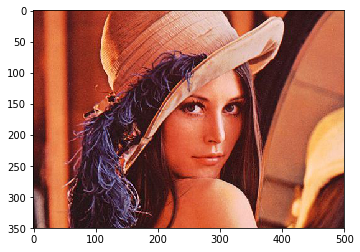

In [6]:
img = Image.open('./lenna.jpg')
img.show()
plt.imshow(img)

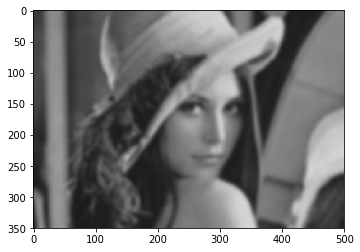

In [23]:
img_gaussian = gaussian_filter(img, sigma=3)
plt.imshow(img_gaussian.astype(np.uint8))
Image.fromarray(img_gaussian).show()

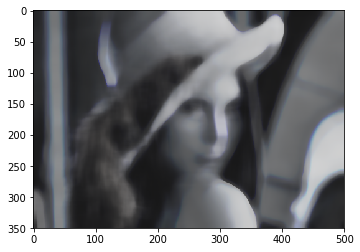

In [18]:
img_med = median_filter(img, size=20)
plt.imshow(img_med.astype(np.uint))

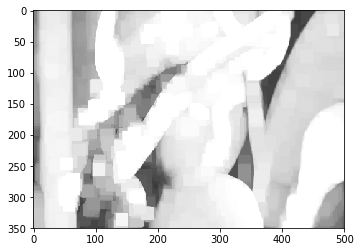

In [20]:
img_max = maximum_filter(img, size=20)
plt.imshow(img_max.astype(np.uint))

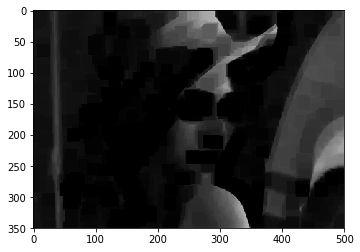

In [22]:
img_min = minimum_filter(img, size=20)
plt.imshow(img_min.astype(np.uint))